In [164]:
# importing libraries
import pandas as pd
import glob
import os

df = pd.read_csv('/Users/giannis_ar91data/Desktop/twitter_collection.csv')
df

,id,created_at,text,retweet_count,name,source
0,1521851966934110218,Wed May 04 13:59:18 +0000 2022,Tickets are still available for the brilliant ...,0,theskaped,"<a href=""http://twitter.com/download/iphone"" r..."
1,1521851936470880257,Wed May 04 13:59:10 +0000 2022,Today @aerl_org is delighted to welcome as gue...,4,aerl_org,"<a href=""http://twitter.com/download/iphone"" r..."
2,1521851859161559041,Wed May 04 13:58:52 +0000 2022,There's going to be a Facebook Live Event Enti...,6,_raysunited,"<a href=""http://twitter.com/download/android"" ..."
3,1521851705981349888,Wed May 04 13:58:16 +0000 2022,@ada_daft @deGourlay @clarescastle @ShepherdWa...,0,simonjrogers,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,1521851683290161152,Wed May 04 13:58:10 +0000 2022,The events team at @LBMentorship put in a huge...,0,studioanisa,"<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...,...,...,...
4341,1521777911853953025,Wed May 04 09:05:02 +0000 2022,What are fifty (50) senior officers of the #Fr...,0,JanisSharp,"<a href=""https://about.twitter.com/products/tw..."
4342,1521777718936887296,Wed May 04 09:04:16 +0000 2022,“Environment is today a more visible victim of...,1,EnergyLiveNews,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4343,1521777177469112320,Wed May 04 09:02:07 +0000 2022,Our supplies (sponsored by @portsmouthdsa) con...,8,vansnoborders,"<a href=""http://twitter.com/download/iphone"" r..."
4344,1521777162348634114,Wed May 04 09:02:03 +0000 2022,#EU is to remove #Russia's biggest bank Sberba...,12,AlexKokcharov,"<a href=""https://mobile.twitter.com"" rel=""nofo..."


In [165]:
print(len(df))

4346


In [166]:
import re
from bs4 import BeautifulSoup

def clean(text):
    """ Clean the text and return the cleaned text. """

    # make all letters lowercase
    text = text.lower()
    
    # remove @mentions
    text = re.sub('@[A-Za-z0-9]+', '', text)

    # remove URLs
    text = re.sub('https?://[A-Za-z0-9./]+', '', text)
    
    # remove HTML encoding
    text = BeautifulSoup(text, 'lxml').get_text()
    
     # remove punctuation, numbers
    text = re.sub("[^a-z^A-Z^#]", ' ', text)
    
    #remoce RT
    text = re.sub(r'\brt\b', '', text)
    
    # remove extra whitespaces between words
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [167]:
df['text'] = df['text'].apply(lambda x: clean(x))

df.head(10)

,id,created_at,text,retweet_count,name,source
0,1521851966934110218,Wed May 04 13:59:18 +0000 2022,tickets are still available for the brilliant ...,0,theskaped,"<a href=""http://twitter.com/download/iphone"" r..."
1,1521851936470880257,Wed May 04 13:59:10 +0000 2022,today org is delighted to welcome as guest spe...,4,aerl_org,"<a href=""http://twitter.com/download/iphone"" r..."
2,1521851859161559041,Wed May 04 13:58:52 +0000 2022,there s going to be a facebook live event enti...,6,_raysunited,"<a href=""http://twitter.com/download/android"" ..."
3,1521851705981349888,Wed May 04 13:58:16 +0000 2022,daft they didn t do any food after apart from ...,0,simonjrogers,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,1521851683290161152,Wed May 04 13:58:10 +0000 2022,the events team at put in a huge effort to mak...,0,studioanisa,"<a href=""http://twitter.com/download/iphone"" r..."
5,1521851620379836417,Wed May 04 13:57:55 +0000 2022,just paid out prize money for axieleague so pr...,39,STEVEW00DY,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
6,1521851529287946240,Wed May 04 13:57:33 +0000 2022,we re delighted to announce that the guest spe...,0,SopersHouse,"<a href=""https://www.later.com"" rel=""nofollow""..."
7,1521851426472968194,Wed May 04 13:57:09 +0000 2022,happening now optimising nutrient management p...,0,SDG2AdvocacyHub,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
8,1521851371187851265,Wed May 04 13:56:56 +0000 2022,an adverse reaction is an event deemed to be r...,0,BardellLaura,"<a href=""http://twitter.com/download/iphone"" r..."
9,1521851366771245058,Wed May 04 13:56:55 +0000 2022,event we re excited to join the #nanodimension...,1,GisInkjet,"<a href=""https://mobile.twitter.com"" rel=""nofo..."


In [168]:
df['source'] = df['source'].astype(str)
df['source'] = df['source'].apply(lambda x: clean(x))

df.head(10)

,id,created_at,text,retweet_count,name,source
0,1521851966934110218,Wed May 04 13:59:18 +0000 2022,tickets are still available for the brilliant ...,0,theskaped,twitter for iphone
1,1521851936470880257,Wed May 04 13:59:10 +0000 2022,today org is delighted to welcome as guest spe...,4,aerl_org,twitter for iphone
2,1521851859161559041,Wed May 04 13:58:52 +0000 2022,there s going to be a facebook live event enti...,6,_raysunited,twitter for android
3,1521851705981349888,Wed May 04 13:58:16 +0000 2022,daft they didn t do any food after apart from ...,0,simonjrogers,twitter web app
4,1521851683290161152,Wed May 04 13:58:10 +0000 2022,the events team at put in a huge effort to mak...,0,studioanisa,twitter for iphone
5,1521851620379836417,Wed May 04 13:57:55 +0000 2022,just paid out prize money for axieleague so pr...,39,STEVEW00DY,twitter web app
6,1521851529287946240,Wed May 04 13:57:33 +0000 2022,we re delighted to announce that the guest spe...,0,SopersHouse,latermedia
7,1521851426472968194,Wed May 04 13:57:09 +0000 2022,happening now optimising nutrient management p...,0,SDG2AdvocacyHub,twitter web app
8,1521851371187851265,Wed May 04 13:56:56 +0000 2022,an adverse reaction is an event deemed to be r...,0,BardellLaura,twitter for iphone
9,1521851366771245058,Wed May 04 13:56:55 +0000 2022,event we re excited to join the #nanodimension...,1,GisInkjet,twitter web app


In [169]:
def find_tags(row_string):
    tags = [x for x in row_string if x.startswith('#')]
    
    return tags

df['split'] = df['text'].str.split(' ')

df['hashtags'] = df['split'].apply(lambda row : find_tags(row))
df['hashtags'] = df['hashtags'].apply(lambda x : str(x).replace('\\n', ',').replace('\\', '').replace("'", ""))
df.drop('split', axis=1, inplace=True)

In [170]:
def clean(text):
    
    # remove punctuation, numbers, hashtag symbols
    text = re.sub("[^a-zA-Z]", ' ', text)
    
    return text

In [171]:
df['text'] = df['text'].apply(lambda x: clean(x))

df.head(10)

,id,created_at,text,retweet_count,name,source,hashtags
0,1521851966934110218,Wed May 04 13:59:18 +0000 2022,tickets are still available for the brilliant ...,0,theskaped,twitter for iphone,[]
1,1521851936470880257,Wed May 04 13:59:10 +0000 2022,today org is delighted to welcome as guest spe...,4,aerl_org,twitter for iphone,[]
2,1521851859161559041,Wed May 04 13:58:52 +0000 2022,there s going to be a facebook live event enti...,6,_raysunited,twitter for android,[]
3,1521851705981349888,Wed May 04 13:58:16 +0000 2022,daft they didn t do any food after apart from ...,0,simonjrogers,twitter web app,[]
4,1521851683290161152,Wed May 04 13:58:10 +0000 2022,the events team at put in a huge effort to mak...,0,studioanisa,twitter for iphone,[]
5,1521851620379836417,Wed May 04 13:57:55 +0000 2022,just paid out prize money for axieleague so pr...,39,STEVEW00DY,twitter web app,[]
6,1521851529287946240,Wed May 04 13:57:33 +0000 2022,we re delighted to announce that the guest spe...,0,SopersHouse,latermedia,[]
7,1521851426472968194,Wed May 04 13:57:09 +0000 2022,happening now optimising nutrient management p...,0,SDG2AdvocacyHub,twitter web app,[]
8,1521851371187851265,Wed May 04 13:56:56 +0000 2022,an adverse reaction is an event deemed to be r...,0,BardellLaura,twitter for iphone,[]
9,1521851366771245058,Wed May 04 13:56:55 +0000 2022,event we re excited to join the nanodimension...,1,GisInkjet,twitter web app,[#nanodimension]


In [172]:
df.to_csv('/Users/giannis_ar91data/Desktop/collected_Tweets10.csv')

In [173]:
pip install --giannis_ar91data-U nltk


Usage:   
  /Users/giannis_ar91data/opt/anaconda3/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /Users/giannis_ar91data/opt/anaconda3/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /Users/giannis_ar91data/opt/anaconda3/bin/python -m pip install [options] [-e] <vcs project url> ...
  /Users/giannis_ar91data/opt/anaconda3/bin/python -m pip install [options] [-e] <local project path> ...
  /Users/giannis_ar91data/opt/anaconda3/bin/python -m pip install [options] <archive url/path> ...

no such option: --giannis_ar91data-U
Note: you may need to restart the kernel to use updated packages.


In [174]:
!pip install nltk

In [175]:
import nltk
>>> nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [176]:
from nltk.corpus import stopwords
from nltk import word_tokenize

def remove_stop_words(text):
    """ remove stopwords, return filtered list. """
    
    # remove stopwords and tokenize text into words
    tokens = word_tokenize(text)
    # remove stopwords from tokens
    filtered = [w for w in tokens if not w in stopwords.words('english')]
    return filtered
  

In [177]:
df['text'] = df['text'].apply(lambda x: remove_stop_words(x))

df.head(10)

,id,created_at,text,retweet_count,name,source,hashtags
0,1521851966934110218,Wed May 04 13:59:18 +0000 2022,"[tickets, still, available, brilliant, event, ...",0,theskaped,twitter for iphone,[]
1,1521851936470880257,Wed May 04 13:59:10 +0000 2022,"[today, org, delighted, welcome, guest, speake...",4,aerl_org,twitter for iphone,[]
2,1521851859161559041,Wed May 04 13:58:52 +0000 2022,"[going, facebook, live, event, entitled, would...",6,_raysunited,twitter for android,[]
3,1521851705981349888,Wed May 04 13:58:16 +0000 2022,"[daft, food, apart, room]",0,simonjrogers,twitter web app,[]
4,1521851683290161152,Wed May 04 13:58:10 +0000 2022,"[events, team, put, huge, effort, make, openin...",0,studioanisa,twitter for iphone,[]
5,1521851620379836417,Wed May 04 13:57:55 +0000 2022,"[paid, prize, money, axieleague, proud, everyo...",39,STEVEW00DY,twitter web app,[]
6,1521851529287946240,Wed May 04 13:57:33 +0000 2022,"[delighted, announce, guest, speaker, next, la...",0,SopersHouse,latermedia,[]
7,1521851426472968194,Wed May 04 13:57:09 +0000 2022,"[happening, optimising, nutrient, management, ...",0,SDG2AdvocacyHub,twitter web app,[]
8,1521851371187851265,Wed May 04 13:56:56 +0000 2022,"[adverse, reaction, event, deemed, related, tr...",0,BardellLaura,twitter for iphone,[]
9,1521851366771245058,Wed May 04 13:56:55 +0000 2022,"[event, excited, join, nanodimension, team, ev...",1,GisInkjet,twitter web app,[#nanodimension]


In [178]:
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """ Map POS tag to first character lemmatize() accepts. """
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize(tokens):
    """ Lemmatize all words in given list of tokens. """

    lemmatizer = WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(token, get_wordnet_pos(token))
            for token in tokens]

    return lems

In [179]:
df['text'] = df['text'].apply(lambda x: lemmatize(x))

df

,id,created_at,text,retweet_count,name,source,hashtags
0,1521851966934110218,Wed May 04 13:59:18 +0000 2022,"[ticket, still, available, brilliant, event, m...",0,theskaped,twitter for iphone,[]
1,1521851936470880257,Wed May 04 13:59:10 +0000 2022,"[today, org, delighted, welcome, guest, speake...",4,aerl_org,twitter for iphone,[]
2,1521851859161559041,Wed May 04 13:58:52 +0000 2022,"[go, facebook, live, event, entitle, would, co...",6,_raysunited,twitter for android,[]
3,1521851705981349888,Wed May 04 13:58:16 +0000 2022,"[daft, food, apart, room]",0,simonjrogers,twitter web app,[]
4,1521851683290161152,Wed May 04 13:58:10 +0000 2022,"[event, team, put, huge, effort, make, opening...",0,studioanisa,twitter for iphone,[]
...,...,...,...,...,...,...,...
4341,1521777911853953025,Wed May 04 09:05:02 +0000 2022,"[fifty, senior, officer, french, military, ukr...",0,JanisSharp,tweetdeck,"[#french, #military, #ukraine]"
4342,1521777718936887296,Wed May 04 09:04:16 +0000 2022,"[environment, today, visible, victim, war, ukr...",1,EnergyLiveNews,twitter web app,[]
4343,1521777177469112320,Wed May 04 09:02:07 +0000 2022,"[supply, sponsor, continue, distribute, child,...",8,vansnoborders,twitter for iphone,[]
4344,1521777162348634114,Wed May 04 09:02:03 +0000 2022,"[eu, remove, russia, big, bank, sberbank, two,...",12,AlexKokcharov,twitter web app,"[#eu, #russia, #swift]"


In [180]:
df.to_csv('/Users/giannis_ar91data/Desktop/collected_tweets_cleaned10.csv')

In [181]:
result = str(df['text'])
for w in result: 
    if w not in "[]":
        print(result)

0       [ticket, still, available, brilliant, event, m...
1       [today, org, delighted, welcome, guest, speake...
2       [go, facebook, live, event, entitle, would, co...
3                               [daft, food, apart, room]
4       [event, team, put, huge, effort, make, opening...
                              ...                        
4341    [fifty, senior, officer, french, military, ukr...
4342    [environment, today, visible, victim, war, ukr...
4343    [supply, sponsor, continue, distribute, child,...
4344    [eu, remove, russia, big, bank, sberbank, two,...
4345    [monument, soviet, spy, dismantle, rovno, ukra...
Name: text, Length: 4346, dtype: object
0       [ticket, still, available, brilliant, event, m...
1       [today, org, delighted, welcome, guest, speake...
2       [go, facebook, live, event, entitle, would, co...
3                               [daft, food, apart, room]
4       [event, team, put, huge, effort, make, opening...
                              ..

In [182]:
result = str(df['text'])
for w in result:
    df['text'] = re.sub(r"[\([{})\]]", "", result)
print(df['text'])

0       0       ticket, still, available, brilliant, e...
1       0       ticket, still, available, brilliant, e...
2       0       ticket, still, available, brilliant, e...
3       0       ticket, still, available, brilliant, e...
4       0       ticket, still, available, brilliant, e...
                              ...                        
4341    0       ticket, still, available, brilliant, e...
4342    0       ticket, still, available, brilliant, e...
4343    0       ticket, still, available, brilliant, e...
4344    0       ticket, still, available, brilliant, e...
4345    0       ticket, still, available, brilliant, e...
Name: text, Length: 4346, dtype: object


In [183]:
df['text']=df['text'].str.replace(r'^(0+)', '')
df.head()

<ipython-input-183-b4b34a299f3c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace(r'^(0+)', '')


,id,created_at,text,retweet_count,name,source,hashtags
0,1521851966934110218,Wed May 04 13:59:18 +0000 2022,"ticket, still, available, brilliant, ev...",0,theskaped,twitter for iphone,[]
1,1521851936470880257,Wed May 04 13:59:10 +0000 2022,"ticket, still, available, brilliant, ev...",4,aerl_org,twitter for iphone,[]
2,1521851859161559041,Wed May 04 13:58:52 +0000 2022,"ticket, still, available, brilliant, ev...",6,_raysunited,twitter for android,[]
3,1521851705981349888,Wed May 04 13:58:16 +0000 2022,"ticket, still, available, brilliant, ev...",0,simonjrogers,twitter web app,[]
4,1521851683290161152,Wed May 04 13:58:10 +0000 2022,"ticket, still, available, brilliant, ev...",0,studioanisa,twitter for iphone,[]


In [184]:
df.to_csv('/Users/giannis_ar91data/Desktop/collected_tweets_cleaned10.csv')

In [185]:
df.dtypes

id                int64
created_at       object
text             object
retweet_count     int64
name             object
source           object
hashtags         object
dtype: object

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timezone
import re

df = df.filter(['id', 'created_at'], axis=1)
df['created_at']=pd.to_datetime(df['created_at'], format='%a %B %d %H:%M:%S +0000 %Y')
df['hour'] = df['created_at'].dt.hour
df.head()


,id,created_at,hour
0,1521851966934110218,2022-05-04 13:59:18,13
1,1521851936470880257,2022-05-04 13:59:10,13
2,1521851859161559041,2022-05-04 13:58:52,13
3,1521851705981349888,2022-05-04 13:58:16,13
4,1521851683290161152,2022-05-04 13:58:10,13


[9, 10, 11, 12, 13, 14, 15, 16, 17]
[500, 646, 607, 569, 628, 303, 302, 379, 412]


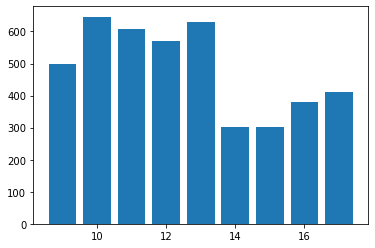

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

In [187]:
hours = df['hour'].unique() #remove duplicate values
hours = sorted(hours)
print(hours)
counts = df.groupby(['hour']).count().to_numpy()
counts = [i[0] for i in counts]
print(counts)

plt.bar(hours, counts)
plt.show()
plt.figure(figsize=(25,15))

In [157]:
df2 = pd.read_csv('/Users/giannis_ar91data/Desktop/collected_tweets_cleaned10.csv')
df2

,Unnamed: 0,id,created_at,text,retweet_count,name,source,hashtags
0,0,1521851966934110218,Wed May 04 13:59:18 +0000 2022,"['ticket', 'still', 'available', 'brilliant', ...",0,theskaped,twitter for iphone,[]
1,1,1521851936470880257,Wed May 04 13:59:10 +0000 2022,"['today', 'org', 'delighted', 'welcome', 'gues...",4,aerl_org,twitter for iphone,[]
2,2,1521851859161559041,Wed May 04 13:58:52 +0000 2022,"['go', 'facebook', 'live', 'event', 'entitle',...",6,_raysunited,twitter for android,[]
3,3,1521851705981349888,Wed May 04 13:58:16 +0000 2022,"['daft', 'food', 'apart', 'room']",0,simonjrogers,twitter web app,[]
4,4,1521851683290161152,Wed May 04 13:58:10 +0000 2022,"['event', 'team', 'put', 'huge', 'effort', 'ma...",0,studioanisa,twitter for iphone,[]
...,...,...,...,...,...,...,...,...
4341,4341,1521777911853953025,Wed May 04 09:05:02 +0000 2022,"['fifty', 'senior', 'officer', 'french', 'mili...",0,JanisSharp,tweetdeck,"[#french, #military, #ukraine]"
4342,4342,1521777718936887296,Wed May 04 09:04:16 +0000 2022,"['environment', 'today', 'visible', 'victim', ...",1,EnergyLiveNews,twitter web app,[]
4343,4343,1521777177469112320,Wed May 04 09:02:07 +0000 2022,"['supply', 'sponsor', 'continue', 'distribute'...",8,vansnoborders,twitter for iphone,[]
4344,4344,1521777162348634114,Wed May 04 09:02:03 +0000 2022,"['eu', 'remove', 'russia', 'big', 'bank', 'sbe...",12,AlexKokcharov,twitter web app,"[#eu, #russia, #swift]"


In [172]:
df_filtered = df2.groupby(['name']).count()
df_filtered


,Unnamed: 0,id,created_at,text,retweet_count,source,hashtags
name,,,,,,,
05smjyun_,1,1,1,1,1,1,1
095hard,1,1,1,1,1,1,1
0Maxw2,1,1,1,1,1,1,1
100dro_,1,1,1,1,1,1,1
1453MLT,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
zerozerocoins,1,1,1,1,1,1,1
zetta_genomics,1,1,1,1,1,1,1
ziambtc,1,1,1,1,1,1,1


In [174]:
df_filtered = df_filtered.reset_index()
df_filtered = df_filtered.sort_values(["id"], ascending=False)
df_filtered.head(10)

,index,name,Unnamed: 0,id,created_at,text,retweet_count,source,hashtags
0,2303,artfinderlatest,74,74,74,74,74,74,74
1,3186,ricardowec,39,39,39,39,39,39,39
2,734,FRONTIERFM,36,36,36,36,36,36,36
3,2077,UKCareersFair,32,32,32,32,32,32,32
4,583,Diplomacy140,27,27,27,27,27,27,27
5,2048,TonyNewton1,24,24,24,24,24,24,24
6,3377,tixSouthEast,18,18,18,18,18,18,18
7,2571,ennomnom,18,18,18,18,18,18,18
8,1381,MissKatherineLK,16,16,16,16,16,16,16
9,2054,TownleyArt,16,16,16,16,16,16,16


In [175]:
users = [i for i in df_filtered['name']]
counts = [i for i in df_filtered['id']]

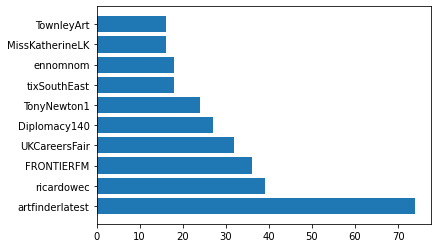

In [176]:
plt.barh(users[:10],counts[:10])
plt.show()

In [155]:
!pip install wordcloud

In [166]:
tweets_list = [i for i in df2["text"]]
for i in tweets_list:
    words = i.split()


In [167]:
hashtags_dict = {}
words = i.split()
for i in df2['hashtags']:
    i = i.replace('[', '').replace(']', '')
    for w in i.split(', '):
        if w.startswith("#"):
            try:
                hashtags_dict[w] +=1
            except KeyError:
                hashtags_dict[w] = 1

In [168]:
tags = list(hashtags_dict.keys())
tags_count = list(hashtags_dict.values())

In [169]:
df3 = pd.DataFrame({'HashTag' : tags, 'Frequency' : tags_count})
df3

,HashTag,Frequency
0,#nanodimension,1
1,#lt,4
2,#foundercamp,1
3,#leadership,3
4,#lunch,1
...,...,...
1356,#spaceshost,1
1357,#osint,1
1358,#humanrightsviolations,1
1359,#hyprocrtices,1


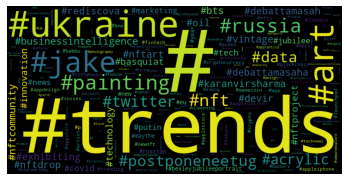

In [171]:
from wordcloud import WordCloud

def make_wordcloud(counts):
    cloud = WordCloud(width=800, height=400)
    cloud.generate_from_frequencies(counts)
    #image = cloud.to_image()
    #image.save("wordcloud.png")
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()


make_wordcloud(hashtags_dict)

In [181]:
df3_sorted = df3.sort_values(by='Frequency', ascending=False)[:15]

Text(0, 0.5, 'Frequency')

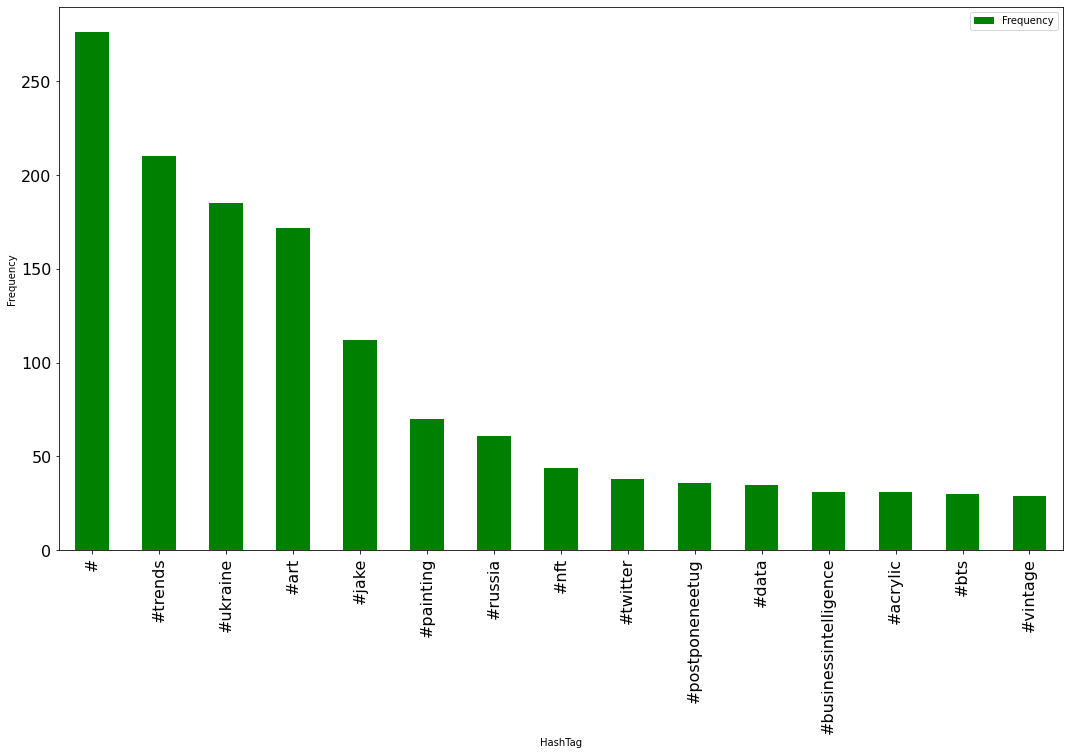

In [184]:
ax = df3_sorted.plot(x="HashTag", y=["Frequency"], kind="bar", color=['g'], figsize=(18,10), fontsize=16)
ax.set_xlabel("HashTag")
ax.set_ylabel("Frequency")